In [1]:
%load_ext autoreload

In [35]:
%autoreload 2

from world import BlockWorld
from q_learning import *
from utils import *

In [36]:
MAX_ITER = 5000 # maximum number of iterations for q value iteration
MAX_EPISODES = 100000 # maximum number of episodes for q learning

## Testing both algorithms
Below we can see after how many iterations or episodes both Q-value iteration and Q-learning algorithms converge.

In [20]:
world = BlockWorld(0.8)
it_1, v_values_1, optimal_actions_1 = q_value_iterative(world, 0.9, MAX_ITER)
print(f"Q-value iteration algorithm converged after {it_1} iterations")
world = BlockWorld(0.8)
it_2, v_values_2, optimal_actions_2 = q_learning(world, MAX_EPISODES, 0.9, 0.2)
print(f"Q-learning algorithm converged after {it_2} episodes")


Q-value iteration algorithm converged after 17 iterations
Q-learning algorithm converged after 55416 episodes


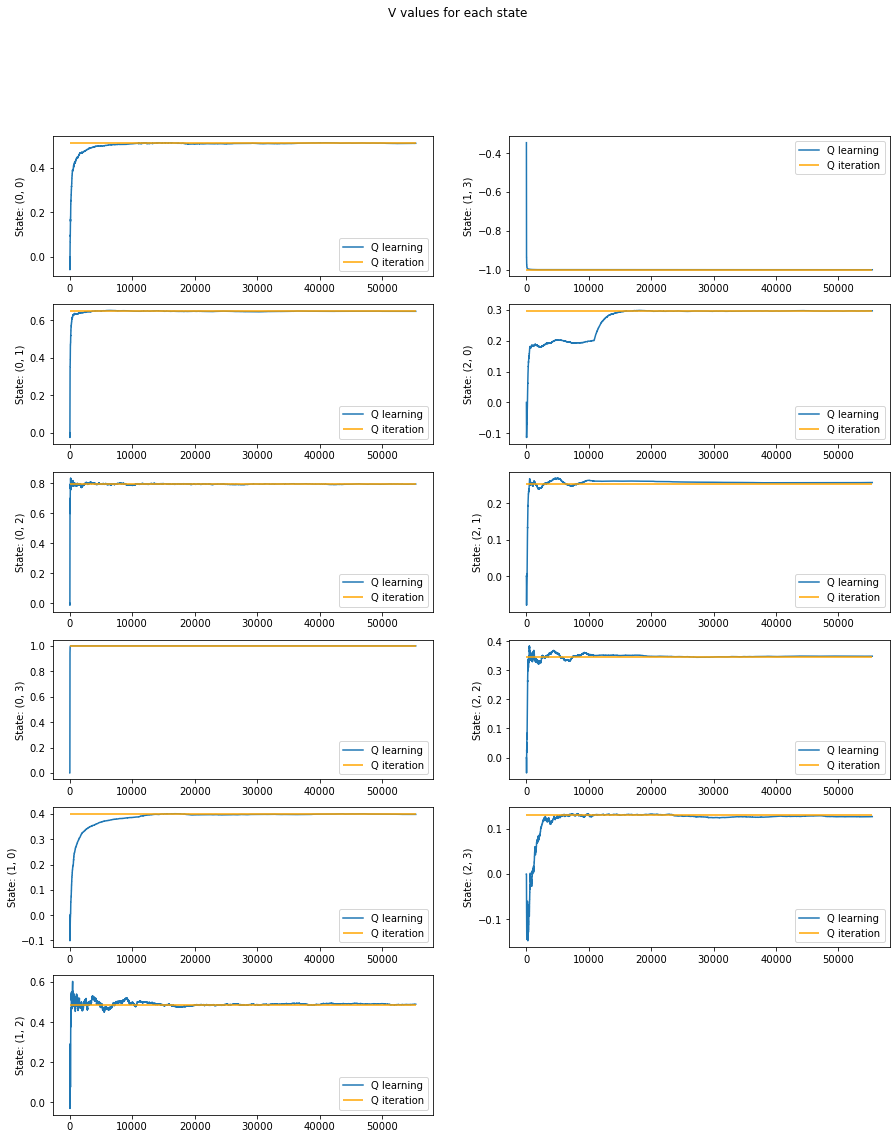

In [21]:
show_v_values_dual(v_values_1, v_values_2, it_1, it_2)

## Optimal actions per iteration: Q-value iteration

Below we can see how optimal actions change for each state during these 17 iterations.
The algorithm ends when each Q(s,a) pair converges.

In [22]:
visualize_optimal_actions(optimal_actions_1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Converged V-values for each state: Q-value iteration algorithm

Below we can see what are the values to which the V-values the Q-value iteration algorithm converges after these 17 iterations.

State: (0, 0)  |  V-value: 0.51
State: (0, 1)  |  V-value: 0.65
State: (0, 2)  |  V-value: 0.80
State: (0, 3)  |  V-value: 1.00
State: (1, 0)  |  V-value: 0.40
State: (1, 2)  |  V-value: 0.49
State: (1, 3)  |  V-value: -1.00
State: (2, 0)  |  V-value: 0.30
State: (2, 1)  |  V-value: 0.25
State: (2, 2)  |  V-value: 0.34
State: (2, 3)  |  V-value: 0.13


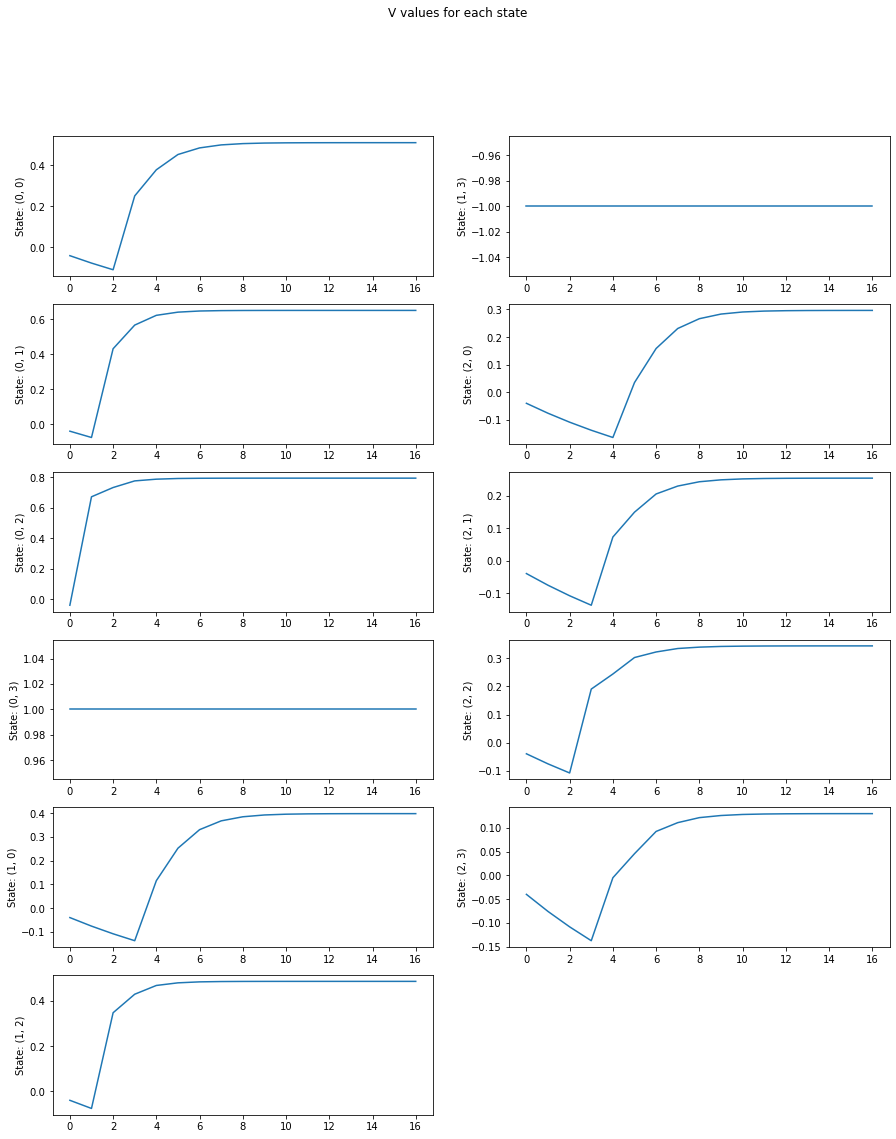

In [23]:
for key, value in v_values_1.items():
    print(f"State: {key}  |  V-value: {value[-1]:.2f}")

show_v_values_single(v_values_1)

## Q-value iteration: discount factor=1.0

Below we can see that in this case the algorithm converges a bit slower. We can also notice that the V-values of the states have increased.

In [37]:
world = BlockWorld(0.8)
it_1, v_values_1, optimal_actions_1 = q_value_iterative(world, 1.0, MAX_ITER)
print(f"Q-value iteration algorithm converged after {it_1} iterations")

for key, value in v_values_1.items():
    print(f"State: {key}  |  V-value: {value[-1]:.2f}")

Q-value iteration algorithm converged after 24 iterations
State: (0, 0)  |  V-value: 0.81
State: (0, 1)  |  V-value: 0.87
State: (0, 2)  |  V-value: 0.92
State: (0, 3)  |  V-value: 1.00
State: (1, 0)  |  V-value: 0.76
State: (1, 2)  |  V-value: 0.66
State: (1, 3)  |  V-value: -1.00
State: (2, 0)  |  V-value: 0.71
State: (2, 1)  |  V-value: 0.66
State: (2, 2)  |  V-value: 0.61
State: (2, 3)  |  V-value: 0.39


## Converged V-values for each state: Q-learning algorithm

Below we can see what are the values to which the V-values the Q-learning iteration algorithm converges.

In [25]:
for key, value in v_values_2.items():
    print(f"State: {key}  |  V-value: {value[-1]:.2f}")

State: (0, 0)  |  V-value: 0.51
State: (0, 1)  |  V-value: 0.65
State: (0, 2)  |  V-value: 0.80
State: (0, 3)  |  V-value: 1.00
State: (1, 0)  |  V-value: 0.40
State: (1, 2)  |  V-value: 0.49
State: (1, 3)  |  V-value: -1.00
State: (2, 0)  |  V-value: 0.30
State: (2, 1)  |  V-value: 0.26
State: (2, 2)  |  V-value: 0.35
State: (2, 3)  |  V-value: 0.13


## Q-learning: learning rate

Using constant learning rate hasn't shown itself as beneficial. Using lower learning rate has lead to smaller oscilations in V-values for each state than using higher learning rates. By using constant learning rate the algorithm hasn't been able to converged even after 100k iterations. That means that in both cases the algorithm didn't manage to converge each Q(state,action) pair in 100k iterations. But in both cases the optimal path towards positive end state was learned.


On the other side using adaptive learning rate (as seen at the beginning of the notebook) has achieved much better results.

### learning rate = 0.0125

In [33]:
it_2, v_values_2, optimal_actions_2 = q_learning(world, MAX_EPISODES, 0.9, 0.2, alpha=0.0125)
print(f"Q-learning algorithm converged after {it_2} episodes")

actions = ['north', 'south', 'east', 'west', 'End']
last_optimal_actions_2 = {state:action[-1] for state, action in optimal_actions_2.items()}
for (key, value), optimal_act in zip(v_values_2.items(), last_optimal_actions_2.values()):
    print(f"State: {key}  |  V-value: {value[-1]:.2f}  |  Optimal action: {actions[optimal_act]}")


Q-learning algorithm converged after 100000 episodes
State: (0, 0)  |  V-value: 0.51  |  Optimal action: east
State: (0, 1)  |  V-value: 0.64  |  Optimal action: east
State: (0, 2)  |  V-value: 0.79  |  Optimal action: east
State: (0, 3)  |  V-value: 1.00  |  Optimal action: End
State: (1, 0)  |  V-value: 0.39  |  Optimal action: north
State: (1, 2)  |  V-value: 0.45  |  Optimal action: north
State: (1, 3)  |  V-value: -1.00  |  Optimal action: End
State: (2, 0)  |  V-value: 0.30  |  Optimal action: north
State: (2, 1)  |  V-value: 0.28  |  Optimal action: east
State: (2, 2)  |  V-value: 0.35  |  Optimal action: north
State: (2, 3)  |  V-value: 0.18  |  Optimal action: west


### learning rate = 0.1

In [34]:
it_2, v_values_2, optimal_actions_2 = q_learning(world, MAX_EPISODES, 0.9, 0.2, alpha=0.1)
print(f"Q-learning algorithm converged after {it_2} episodes")

actions = ['north', 'south', 'east', 'west', 'End']
last_optimal_actions_2 = {state:action[-1] for state, action in optimal_actions_2.items()}
for (key, value), optimal_act in zip(v_values_2.items(), last_optimal_actions_2.values()):
    print(f"State: {key}  |  V-value: {value[-1]:.2f}  |  Optimal action: {actions[optimal_act]}")


Q-learning algorithm converged after 100000 episodes
State: (0, 0)  |  V-value: 0.50  |  Optimal action: east
State: (0, 1)  |  V-value: 0.66  |  Optimal action: east
State: (0, 2)  |  V-value: 0.82  |  Optimal action: east
State: (0, 3)  |  V-value: 1.00  |  Optimal action: End
State: (1, 0)  |  V-value: 0.36  |  Optimal action: north
State: (1, 2)  |  V-value: 0.29  |  Optimal action: west
State: (1, 3)  |  V-value: -1.00  |  Optimal action: End
State: (2, 0)  |  V-value: 0.27  |  Optimal action: north
State: (2, 1)  |  V-value: 0.20  |  Optimal action: west
State: (2, 2)  |  V-value: 0.34  |  Optimal action: north
State: (2, 3)  |  V-value: 0.10  |  Optimal action: west
